<a href="https://colab.research.google.com/github/ldselvera/huggingface/blob/main/04-Audio-Models/Audio_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [2]:
audio_path = 'example.mp3'

In [3]:
y, sr = librosa.load(audio_path, sr=None)

In [11]:
print(y.shape)
print(sr)
print(y.shape[0]/sr)
y

(630031,)
48000
13.125645833333333


array([-0.05220421, -0.06220762, -0.04791953, ...,  0.        ,
        0.        ,  0.        ], dtype=float32)

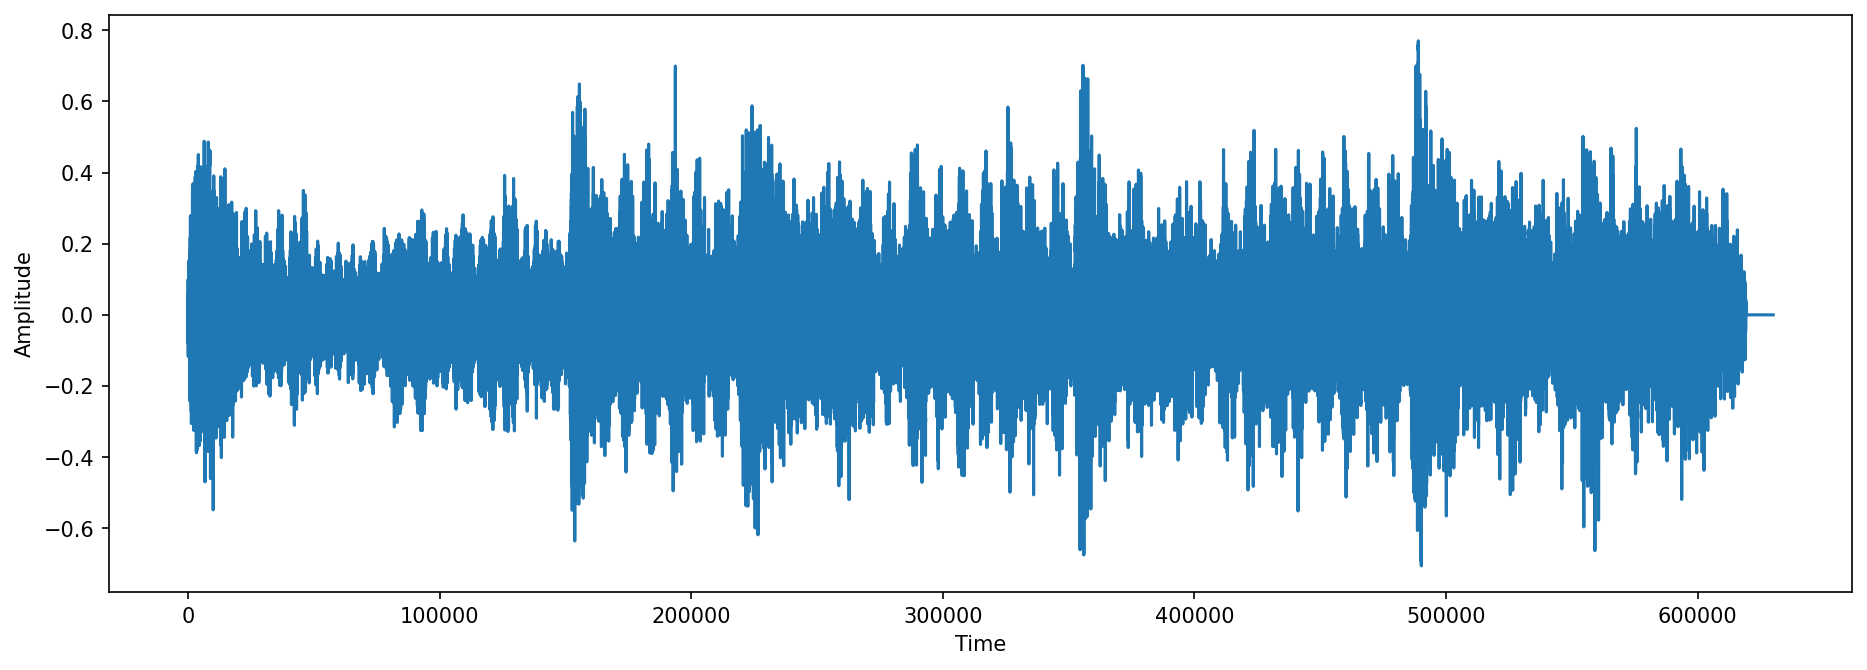

In [12]:
plt.figure(figsize=(15, 5), dpi=150)
plt.plot(y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [13]:
from IPython.display import Audio
Audio(data=y, rate=sr)

In [17]:
# DFT - Discrete Fourier Transform
window = np.hanning(len(y))
windowed_input = y * window
dft = np.fft.rfft(windowed_input)
dft

array([ 2.20216033e+01+0.00000000e+00j, -1.53848612e+01-7.83757079e+00j,
        3.68769589e-01-1.47522648e+01j, ...,
       -5.86705934e-05+1.48828988e-04j, -7.31754172e-05-9.04516760e-05j,
        7.56536829e-05-7.11123767e-05j])

In [18]:
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)
amplitude_db

array([-41.73147371, -43.84451987, -45.20856548, ..., -80.        ,
       -80.        , -80.        ])

In [19]:
frequency = librosa.fft_frequencies(sr=sr, n_fft=len(y))
frequency

array([0.00000000e+00, 7.61867273e-02, 1.52373455e-01, ...,
       2.39998095e+04, 2.39998857e+04, 2.39999619e+04])

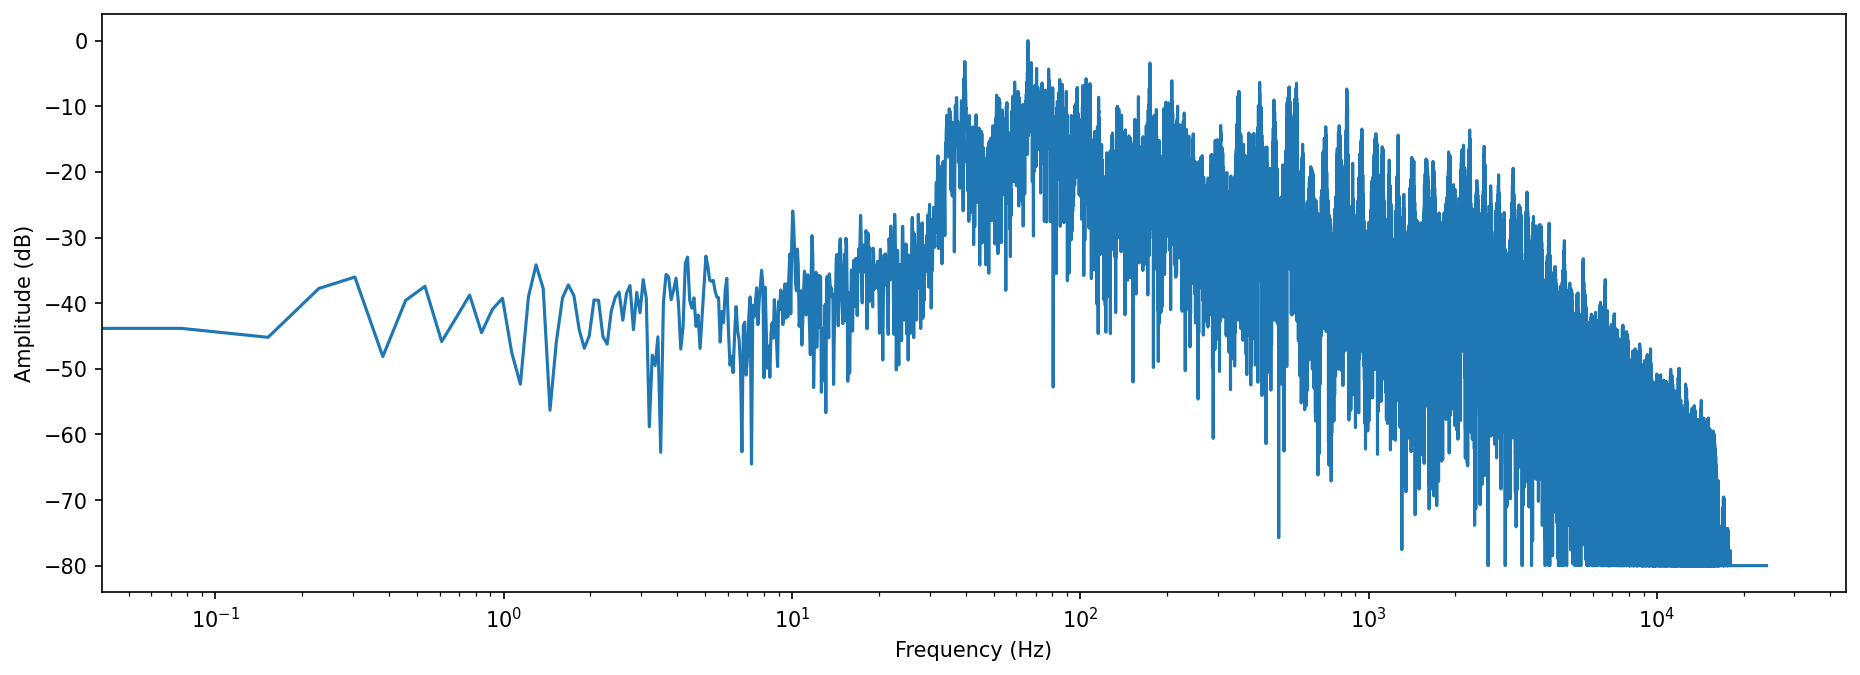

In [22]:
plt.figure(figsize=(15, 5), dpi=150)
plt.plot(frequency, amplitude_db)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.xscale('log')
plt.show()

In [23]:
D =  librosa.stft(y)
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

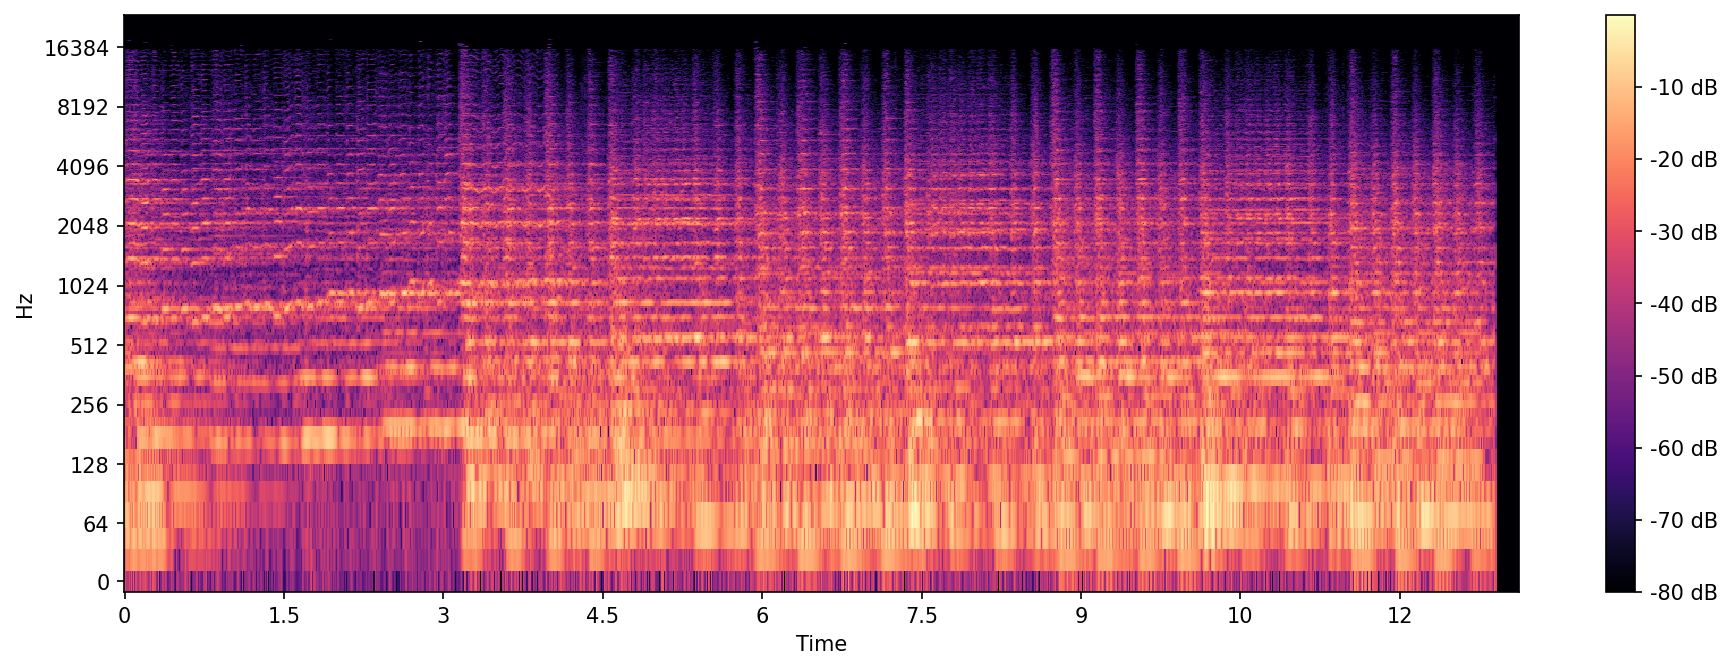

In [24]:
plt.figure(figsize=(15, 5), dpi=150)
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [25]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_db = librosa.power_to_db(S, ref=np.max)

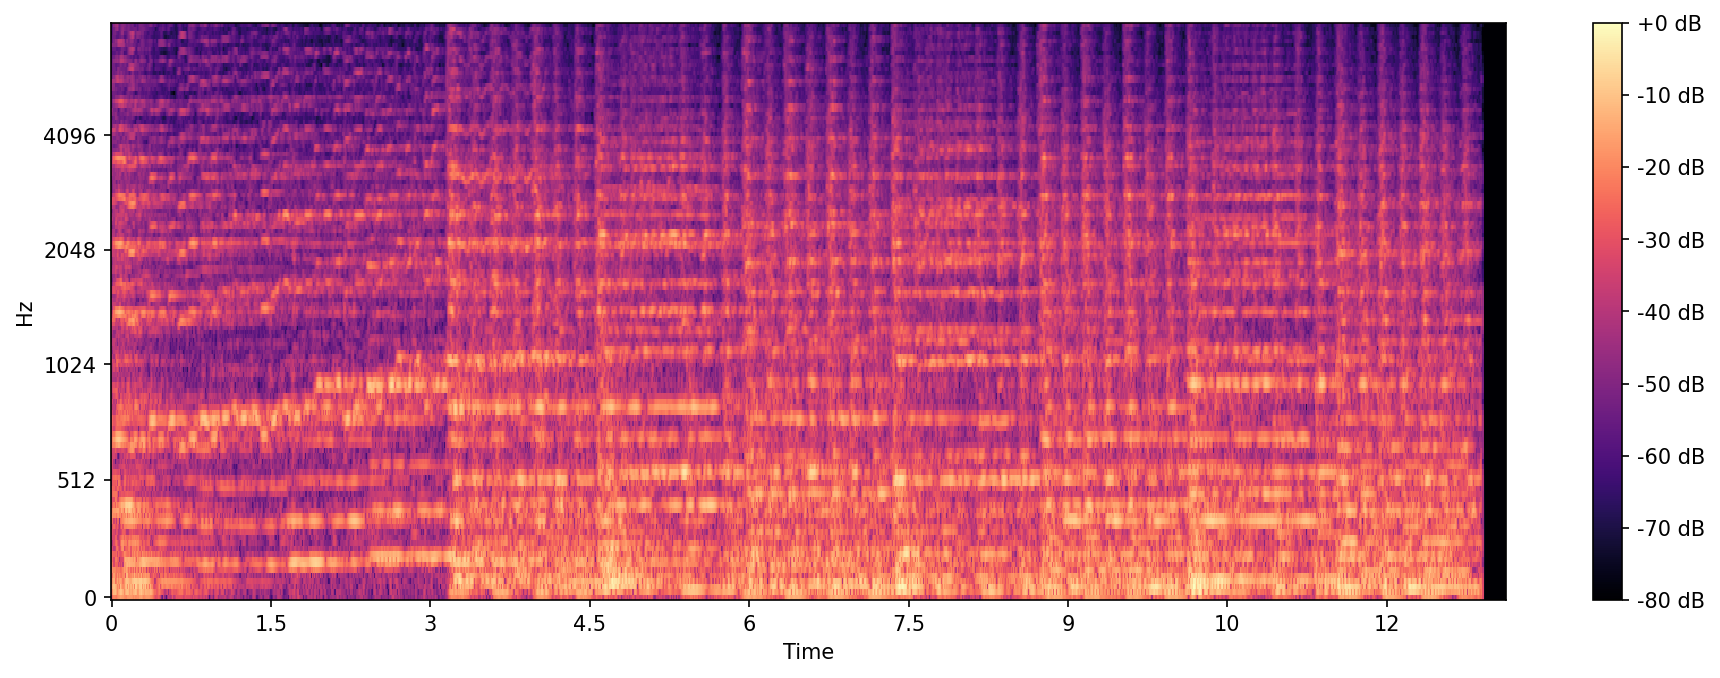

In [29]:
plt.figure(figsize=(15, 5), dpi=150)
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.show()